# Understanding the Inverse Seesaw in the DLRSM

In this notebook we follow the implementation of the ISS in the work [Low scale left-right symmetry and naturally small neutrino mass](https://link.springer.com/article/10.1007/JHEP02(2019)045)

In [26]:
from sympy import MatrixSymbol, BlockMatrix, init_printing, ZeroMatrix, symbols, Identity, Matrix, block_collapse
from sympy import DiagonalMatrix
init_printing()

If $m_D^\prime = 0$ and $m_D = \xi M_D$

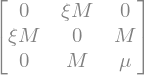

In [3]:
n = 3
MD = MatrixSymbol('M', n,n)
#MD = DiagonalMatrix(MD)
mu = MatrixSymbol(r'mu', n,n)
#mu = DiagonalMatrix(mu)
Z1 = ZeroMatrix(n,n)
In = Identity(n)

xi = symbols(r'\xi')

MLRiss_mDp0 = BlockMatrix(
    [
        [Z1, xi*MD*In, Z1],
        [xi*MD*In, Z1, MD*In],
        [Z1, MD*In, mu*In]
    ]
)
MLRiss_mDp0

In [4]:
from sympy import cos, sin, tan

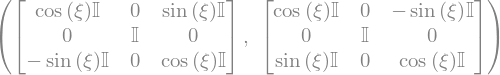

In [5]:
Us = BlockMatrix(
    [
        [cos(xi)*In, Z1, sin(xi)*In],
        [Z1, In, Z1],
        [-sin(xi)*In, Z1, cos(xi)*In]
    ]
)
UsT = BlockMatrix(
    [
        [cos(xi)*In, Z1, -sin(xi)*In],
        [Z1, In, Z1],
        [sin(xi)*In, Z1, cos(xi)*In]
    ]
)
Us, Us.T

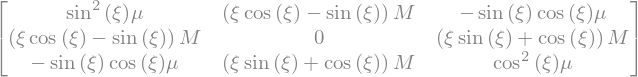

In [6]:
UsTMLRissUs = block_collapse(UsT*MLRiss_mDp0*Us)
UsTMLRissUs

In [7]:
block_collapse(UsTMLRissUs.blocks[0,1])

In [8]:
from sympy import solve, sqrt

In [9]:
sinxi_sol = solve(xi*cos(xi) - sin(xi), sin(xi), dict=True)[0]
sinxi_sol

In [10]:
tanxi_sol = {tan(xi):(sin(xi)/cos(xi)).subs(sinxi_sol)}
tanxi_sol

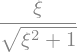

In [11]:
sinxi_approx = xi/sqrt(1 + xi**2)
sinxi_approx

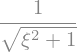

In [12]:
cosxi_approx = 1/sqrt(1 + xi**2)
cosxi_approx

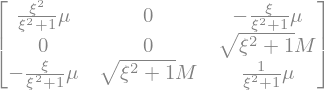

In [13]:
UsTMLRissUs_sym = block_collapse(UsTMLRissUs.subs(sin(xi), sinxi_approx).subs(cos(xi), cosxi_approx)).simplify()
UsTMLRissUs_sym

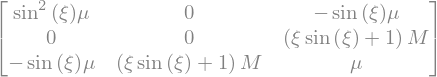

In [14]:
UsTMLRissUs_sym_sinxi = block_collapse(block_collapse(UsTMLRissUs.subs(cos(xi), 1)).simplify().subs(xi - sin(xi), 0))
UsTMLRissUs_sym_sinxi

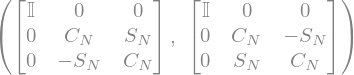

In [ ]:
CN = MatrixSymbol('C_N', 3,3)
CNdiag = DiagonalMatrix(CN)
SN = MatrixSymbol('S_N', 3,3)
SNdiag = DiagonalMatrix(SN)
UN = BlockMatrix(
    [
        [In, Z1, Z1],
        [Z1, CN*In, SN*In],
        [Z1, -SN*In, CN*In]
    ]
)
UNT = BlockMatrix(
    [
        [In, Z1, Z1],
        [Z1, CN*In, -SN*In],
        [Z1, SN*In, CN*In]
    ]
)
UN, UNT

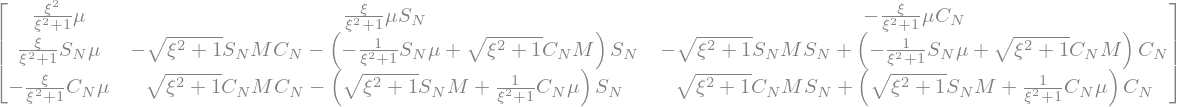

In [16]:
UNTUsTMLRissUsUN = block_collapse(UNT*UsTMLRissUs_sym*UN).subs(cos(xi),1)
UNTUsTMLRissUsUN

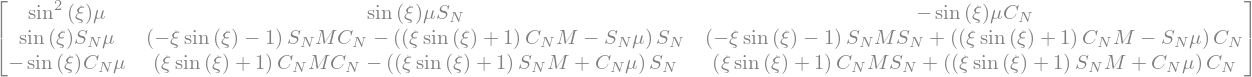

In [17]:
UNTUsTMLRissUsUN_sinxi = block_collapse(UNT*UsTMLRissUs_sym_sinxi*UN)
UNTUsTMLRissUsUN_sinxi

In [18]:
from sympy.physics.quantum import Dagger

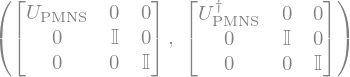

In [19]:
Upmns = MatrixSymbol(r'U_{\text{PMNS}}', 3,3)
Unu = BlockMatrix(
    [
        [Upmns, Z1, Z1],
        [Z1, In, Z1],
        [Z1, Z1, In]
    ]
)
UnuDagger = BlockMatrix(
    [
        [Dagger(Upmns), Z1, Z1],
        [Z1, In, Z1],
        [Z1, Z1, In]
    ]
)
Unu, UnuDagger

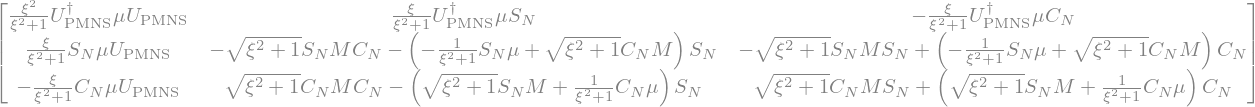

In [185]:
UnuDaggerUNTUsTMLRissUsUNUnu = block_collapse(UnuDagger*UNTUsTMLRissUsUN*Unu)
UnuDaggerUNTUsTMLRissUsUNUnu

In [186]:
from sympy import pi

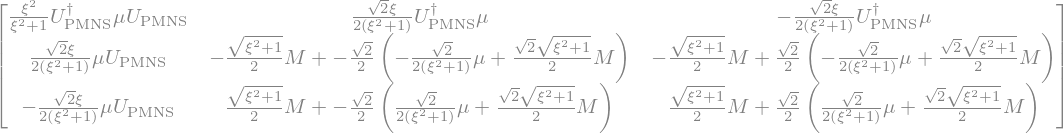

In [187]:
UnuDaggerUNTUsTMLRissUsUNUnu = block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu.subs(CN, cos(pi/4)*In).subs(SN, sin(pi/4)*In))
UnuDaggerUNTUsTMLRissUsUNUnu

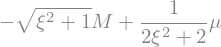

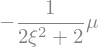

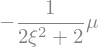

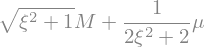

In [190]:
for i in range(1,3):
    for j in range(1,3):
        blij = UnuDaggerUNTUsTMLRissUsUNUnu.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand())
        display(blij_collapsed)
        UnuDaggerUNTUsTMLRissUsUNUnu = UnuDaggerUNTUsTMLRissUsUNUnu.subs(blij, blij_collapsed) 

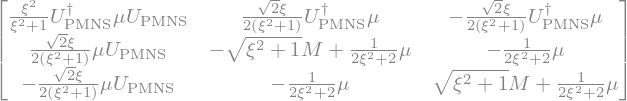

In [191]:
UnuDaggerUNTUsTMLRissUsUNUnu

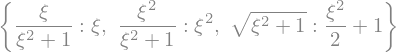

In [193]:
xi_approximations = {
    (sin(xi)**2).subs(sin(xi), sinxi_approx): (sin(xi)**2).subs(sin(xi), sinxi_approx).series(xi, 0, 3).removeO(),
    xi/(1 + xi**2): (xi/(1 + xi**2)).series(xi, 0, 3).removeO(),
    sqrt(1 + xi**2):(sqrt(1 + xi**2)).series(xi, 0, 3).removeO()
}
xi_approximations

In [194]:
UnuDaggerUNTUsTMLRissUsUNUnu = UnuDaggerUNTUsTMLRissUsUNUnu.subs(xi_approximations)

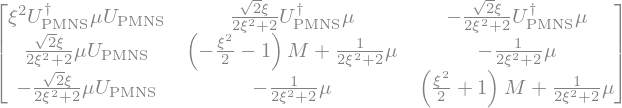

In [195]:
UnuDaggerUNTUsTMLRissUsUNUnu

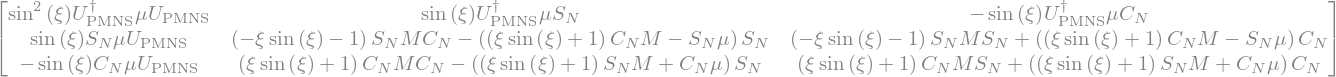

In [200]:
UnuDaggerUNTUsTMLRissUsUNUnu_sinxi = block_collapse(UnuDagger*UNTUsTMLRissUsUN_sinxi*Unu)
UnuDaggerUNTUsTMLRissUsUNUnu_sinxi

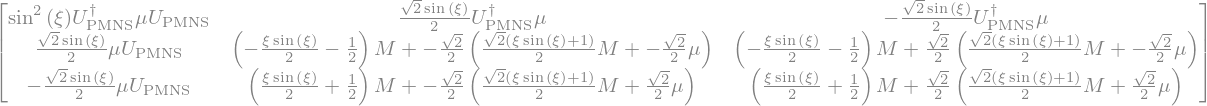

In [201]:
UnuDaggerUNTUsTMLRissUsUNUnu_sinxi = block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_sinxi.subs(CN, cos(pi/4)*In).subs(SN, sin(pi/4)*In))
UnuDaggerUNTUsTMLRissUsUNUnu_sinxi

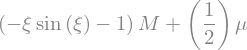

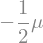

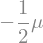

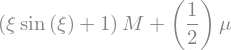

In [202]:
for i in range(1,3):
    for j in range(1,3):
        blij = UnuDaggerUNTUsTMLRissUsUNUnu_sinxi.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuDaggerUNTUsTMLRissUsUNUnu_sinxi = UnuDaggerUNTUsTMLRissUsUNUnu_sinxi.subs(blij, blij_collapsed) 

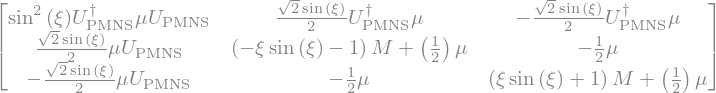

In [203]:
UnuDaggerUNTUsTMLRissUsUNUnu_sinxi

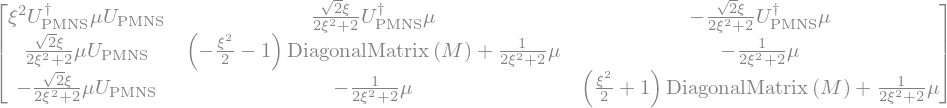

In [204]:
UnuDaggerUNTUsTMLRissUsUNUnu_diag = block_collapse(
    UnuDaggerUNTUsTMLRissUsUNUnu.subs(
    MD, DiagonalMatrix(MD)
)
)
UnuDaggerUNTUsTMLRissUsUNUnu_diag

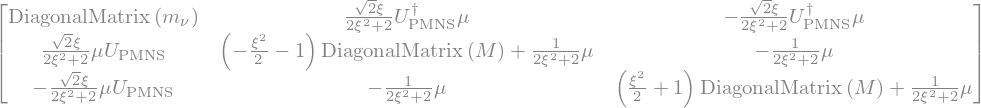

In [205]:
mnu = DiagonalMatrix(MatrixSymbol(r'm_\nu',3,3))
UnuDaggerUNTUsTMLRissUsUNUnu_diag = UnuDaggerUNTUsTMLRissUsUNUnu_diag.subs(
    xi**2*Dagger(Upmns)*mu*Upmns, mnu
)
UnuDaggerUNTUsTMLRissUsUNUnu_diag

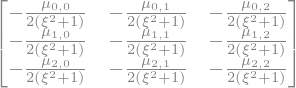

In [206]:
block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag.blocks[1,2]).as_explicit().applyfunc(lambda x:x.factor())

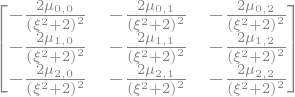

In [163]:
block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag.blocks[2,1]).as_explicit().applyfunc(lambda x:x.factor())

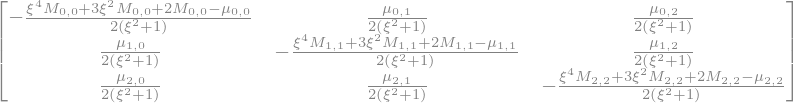

In [207]:
block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag.blocks[1,1]).as_explicit().applyfunc(lambda x:x.factor())

In [168]:
#zeta = symbols(r'\zeta')
#Uzeta = BlockMatrix(
#    [
#        [In, Z1, Z1],
#        [Z1, cos(zeta)*In, -sin(zeta)*In],
#        [Z1, sin(zeta)*In, cos(zeta)*In]
#    ]
#)
#Uzeta

In [170]:
#UZTMUZM = block_collapse(Uzeta.T*block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag.subs(xi,0))*Uzeta)
#UZTMUZM

In [169]:
#block_collapse(UZTMUZM.blocks[2,2]).as_explicit().applyfunc(lambda x:x.factor().trigsimp().subs(zeta, pi/4))

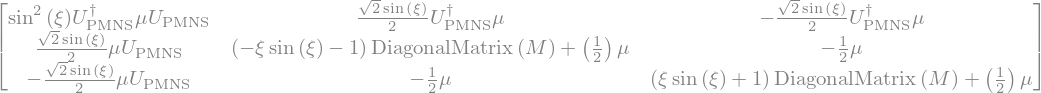

In [208]:
UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi = block_collapse(
    UnuDaggerUNTUsTMLRissUsUNUnu_sinxi.subs(
    MD, DiagonalMatrix(MD)
).subs(CN, cos(pi/4)*In).subs(SN, sin(pi/4)*In)
)
UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi

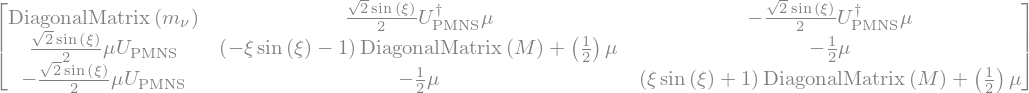

In [209]:
UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi = UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi.subs(
    sin(xi)**2*Dagger(Upmns)*mu*Upmns, mnu
)
UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi

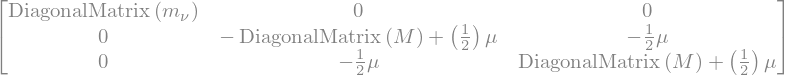

In [210]:
block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi.subs(xi,0))

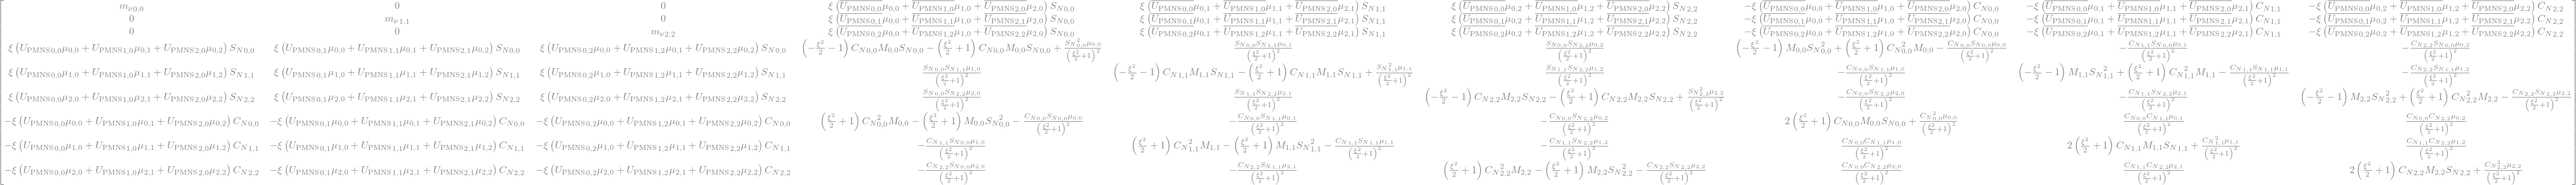

In [95]:
UnuDaggerUNTUsTMLRissUsUNUnu_explicit = UnuDaggerUNTUsTMLRissUsUNUnu_diag.as_explicit()
UnuDaggerUNTUsTMLRissUsUNUnu_explicit

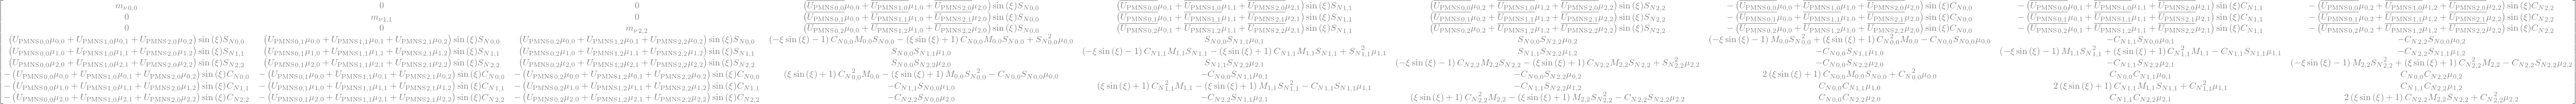

In [96]:
UnuDaggerUNTUsTMLRissUsUNUnu_explicit_sinxi = UnuDaggerUNTUsTMLRissUsUNUnu_diag_sinxi.as_explicit()
UnuDaggerUNTUsTMLRissUsUNUnu_explicit_sinxi

In [97]:
SNi_changes = {
    SNdiag[0,0]:(1-(mu[0,0])/(4*MD[0,0]))/sqrt(2),
    SNdiag[1,1]:(1-(mu[1,1])/(4*MD[1,1]))/sqrt(2),
    SNdiag[2,2]:(1-(mu[2,2])/(4*MD[2,2]))/sqrt(2)
}

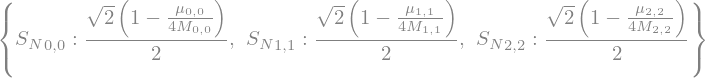

In [98]:
SNi_changes

In [99]:
from sympy import pi

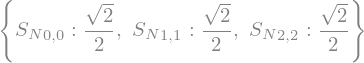

In [100]:
SNi_changes0 = {}
for sn in SNi_changes:
    SNi_changes0[sn] = sin(pi/4)
SNi_changes0

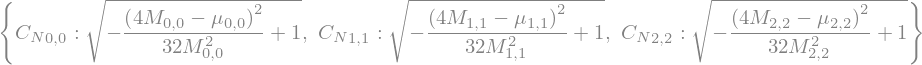

In [101]:
CNi_changes = {}
for key, sn in SNi_changes.items():
    cn = sqrt((1 - sn.simplify()**2).simplify())
    CNi_changes[key.replace(SN, CN)] = cn
CNi_changes

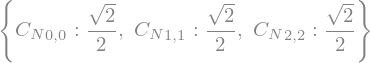

In [102]:
CNi_changes1 = {}
for cn in CNi_changes:
    CNi_changes1[cn] = cos(pi/4)
CNi_changes1

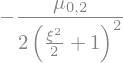

In [103]:
UnuDaggerUNTUsTMLRissUsUNUnu_explicit[3,-1].subs(SNi_changes0).subs(CNi_changes1)#.args[4].args[-1].args

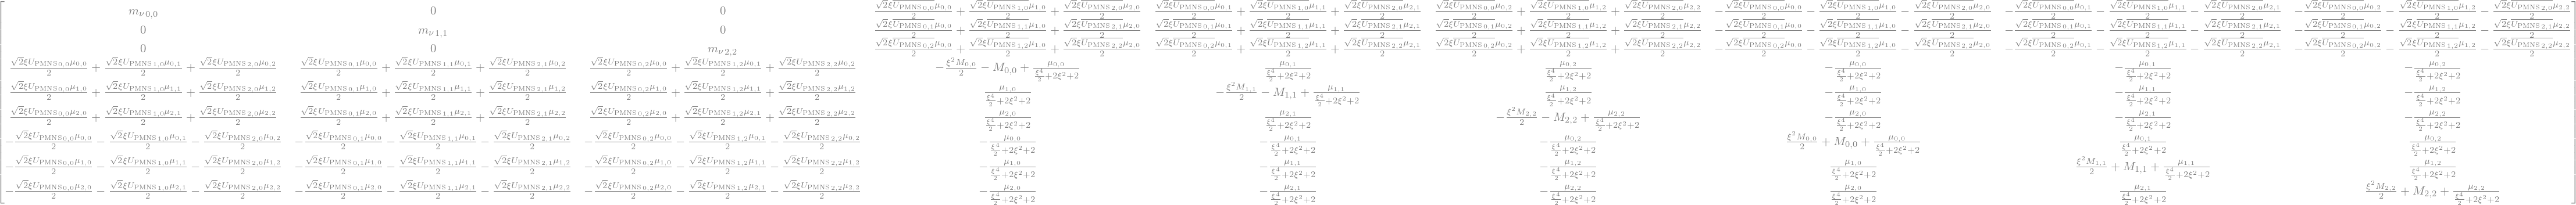

In [108]:
Mblock = UnuDaggerUNTUsTMLRissUsUNUnu_explicit.subs(
    SNi_changes0
).subs(
    CNi_changes1
).applyfunc(lambda x:x.expand()).applyfunc(block_collapse)#.subs(xi, 0)
Mblock

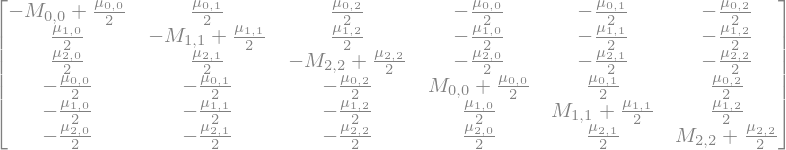

In [106]:
Mblock[3:,3:]

In [107]:
Pb, Db = Mblock[3:,3:].diagonalize()

MatrixError: It is not always possible to express the eigenvalues of a matrix of size 5x5 or higher in radicals. We have CRootOf, but domains other than the rationals are not currently supported. If there are no symbols in the matrix, it should still be possible to compute numeric approximations of the eigenvalues using M.evalf().eigenvals() or M.charpoly().nroots().

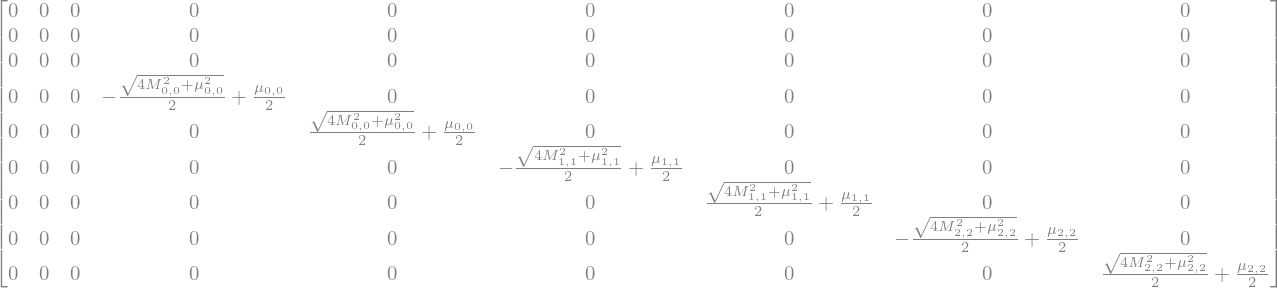

In [76]:
Db

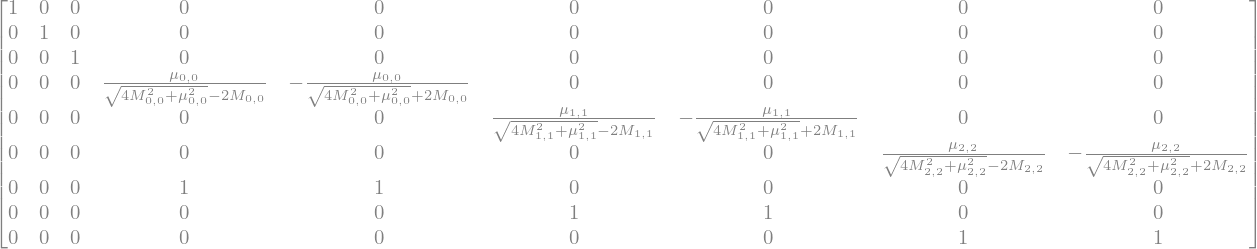

In [77]:
Pb

In [78]:
Pbinv = Pb.inv()

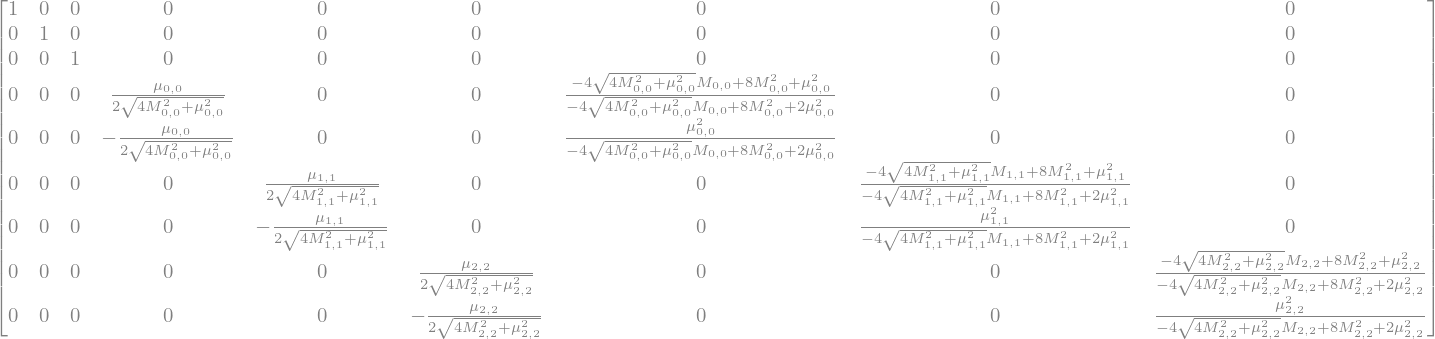

In [79]:
Pbinv

In [41]:
from sympy import eye

In [42]:
Upmns_unitary_relations = {
    key:value for key, value in zip(
        list((Dagger(Upmns)*Upmns).as_explicit()),
        list(eye(3))
    )
}
Upmns_unitary_relations

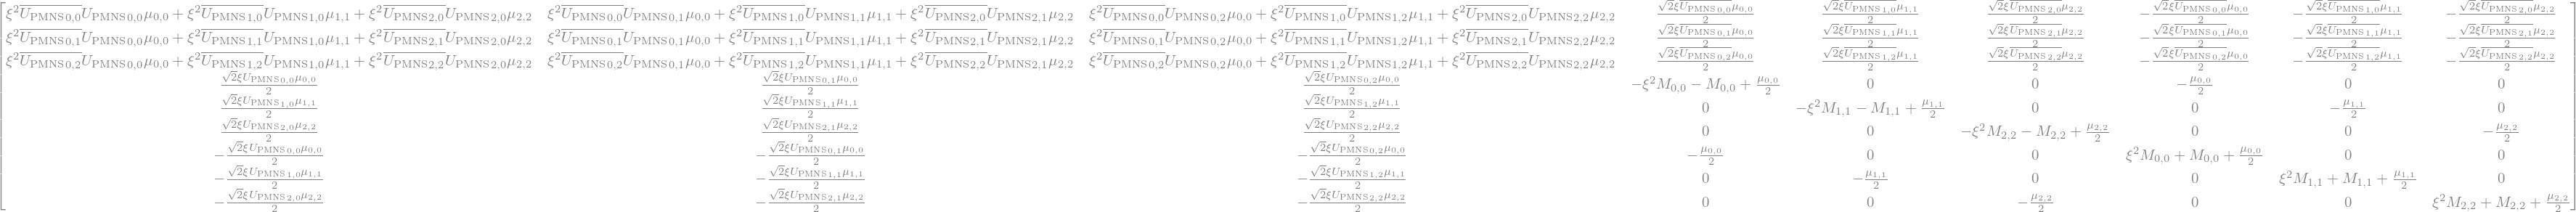

In [64]:
UnuDaggerUNTUsTMLRissUsUNUnu_explicit_sinxi.subs(
    SNi_changes0
).subs(
    CNi_changes1
).applyfunc(lambda x:x.expand()).subs(
    sin(xi), xi
)#.subs(xi**2, 0)

In [44]:
Uf = block_collapse((Us*UN*Unu).subs(cos(xi), 1))

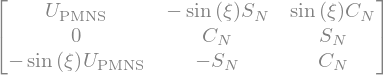

In [45]:
Uf

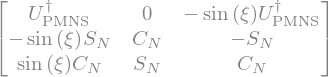

In [46]:
Ufinv = block_collapse((UnuDagger*UNT*UsT).subs(cos(xi), 1))
Ufinv

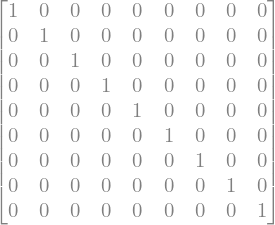

In [47]:
block_collapse(Ufinv*Uf).subs(sin(xi), xi).replace(CN, CNdiag).replace(SN, SNdiag).as_explicit(

).subs(SNi_changes0).subs(CNi_changes1).subs(xi**2,0).subs(Upmns_unitary_relations)

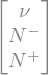

In [48]:
nu = MatrixSymbol(r'\nu', 3,1)
Nm = MatrixSymbol('N^-', 3,1)
Np = MatrixSymbol('N^+', 3,1)
Nu = BlockMatrix(
    [
        [nu],
        [Nm],
        [Np]
    ]
)
Nu

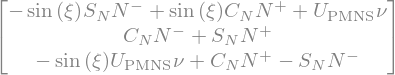

In [49]:
Nuweak = block_collapse(Uf*Nu).factor()
Nuweak

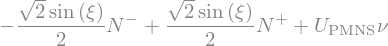

In [50]:
block_collapse(Nuweak.blocks[0].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

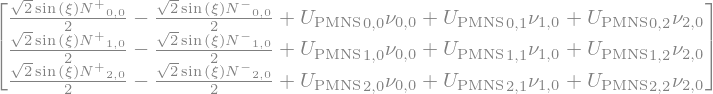

In [51]:
Nuweak.blocks[0].replace(CN, CNdiag).replace(SN, SNdiag).as_explicit(

).subs(SNi_changes0).subs(CNi_changes1).subs(xi**2,0)#.subs(Upmns_unitary_relations)

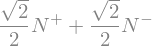

In [52]:
block_collapse(Nuweak.blocks[1].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

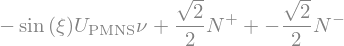

In [53]:
block_collapse(Nuweak.blocks[2].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

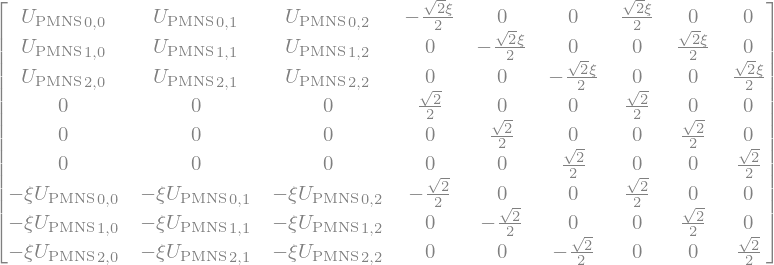

In [58]:
Uf_explicit = Uf.subs(sin(xi), xi).replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In).as_explicit()
Uf_explicit

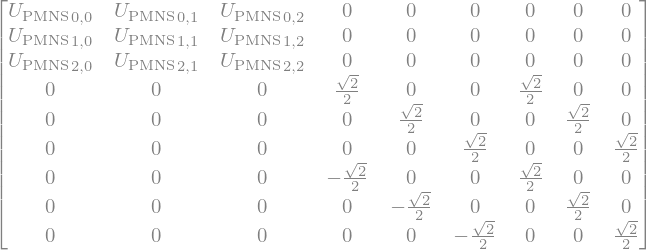

In [59]:
Uf_explicit.subs(xi, 0)

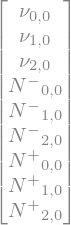

In [60]:
Nu.as_explicit()

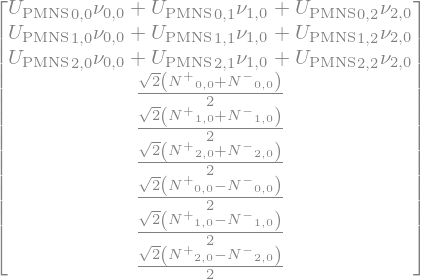

In [63]:
(Uf_explicit.subs(xi, 0)*Nu.as_explicit()).applyfunc(lambda x:x.factor())